In [1]:
import re
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def Input(day, year=2021):
    directory = '{}'.format(year)
    filename = directory + '/input{}.txt'.format(day)
    return open(filename)

def mapt(fn, *args):
    """map(fn, *args) and return the result as a tuple."""
    return tuple(map(fn, *args))

def mapl(fn, *args):
    """map(fn, *args) and return the result as a tuple."""
    return list(map(fn, *args))

def parse(day, parser=str, sep='\n', output='tuple') -> tuple:
    """Split the day's input file into entries separated by `sep`, and apply `parser` to each."""
    entries = open(f'2021/input{day}.txt').read().rstrip().split(sep)
    return mapl(parser, entries)

## [Day 1](https://adventofcode.com/2021/day/1)

In [2]:
def times_depth_increased(i):
    return [1 if e[0] > e[1] else 0 for e in list(zip(i[1:], i[:-1]))]

In [3]:
i = [199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

sum(times_depth_increased(i))

7

In [4]:
i = [int(e) for e in Input('01').readlines()]

sum(times_depth_increased(i))

1184

In [5]:
def times_depth_increased(i, avg=3):
    l = []
    for a in range(avg):
        if a == 0:
            l.append(i)
        else:
            l.append(i[a:])
    l = [sum(e) for e in zip(*l)]
    return [1 if e[1] > e[0] else 0 for e in list(zip(l, l[1:]))]

In [6]:
i = [199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

sum(times_depth_increased(i))

5

In [7]:
i = [int(e) for e in Input('01').readlines()]

sum(times_depth_increased(i))

1158

## [Day 2](https://adventofcode.com/2021/day/2)

In [8]:
i = "forward 5\ndown 5\nforward 8\nup 3\ndown 8\nforward 2"

x, y = 0, 0

d = re.findall(r'(\w+) (\d+)', i)

for e in d:
    if e[0] == 'forward':
        x += int(e[1])
    elif e[0] == 'down':
        y += int(e[1])
    else:
        y += -int(e[1])
        
x * y

150

In [9]:
i = Input('02').read()

x, y = 0, 0

d = re.findall(r'(\w+) (\d+)', i)

for e in d:
    if e[0] == 'forward':
        x += int(e[1])
    elif e[0] == 'down':
        y += int(e[1])
    else:
        y += -int(e[1])
        
x * y

1690020

In [10]:
i = "forward 5\ndown 5\nforward 8\nup 3\ndown 8\nforward 2"

x, y, aim = 0, 0, 0

d = re.findall(r'(\w+) (\d+)', i)

for e in d:
    if e[0] == 'forward':
        x += int(e[1])
        y += aim * int(e[1])
    elif e[0] == 'down':
        aim += int(e[1])
    else:
        aim += -int(e[1])
        
x * y

900

In [11]:
i = Input('02').read()

x, y, aim = 0, 0, 0

d = re.findall(r'(\w+) (\d+)', i)

for e in d:
    if e[0] == 'forward':
        x += int(e[1])
        y += aim * int(e[1])
    elif e[0] == 'down':
        aim += int(e[1])
    else:
        aim += -int(e[1])
        
x * y

1408487760

## [Day 3](https://adventofcode.com/2021/day/3)

In [12]:
i = "00100\n11110\n10110\n10111\n10101\n01111\n00111\n11100\n10000\n11001\n00010\n01010"

def gamma_rate(i):
    gamma = ""
    i = [list(e) for e in i.strip().split('\n')]
    for e in zip(*i):
        if e.count('1') > len(e) / 2:
            gamma += '1'
        else:
            gamma += '0'
    return gamma

def epsilon_rate(i):
    epsilon = ""
    gamma = gamma_rate(i)
    for e in gamma:
        if e == '0':
            epsilon += '1'
        else:
            epsilon += '0'
    return epsilon

def binaryToDecimal(n):
    return int(n,2)

binaryToDecimal(epsilon_rate(i)) * binaryToDecimal(gamma_rate(i))

198

In [13]:
i = Input('03').read()

binaryToDecimal(epsilon_rate(i)) * binaryToDecimal(gamma_rate(i))

749376

In [14]:
i = "00100\n11110\n10110\n10111\n10101\n01111\n00111\n11100\n10000\n11001\n00010\n01010"

def oxygen_generator_rating(i):
    i = [list(e) for e in i.strip().split('\n')]
    c = -1
    while len(i) > 1:
        c += 1
        j = []
        if list(zip(*i))[c].count('1') < len(list(zip(*i))[c])/2:
            for e in i:
                if e[c] == '0':
                    j.append(e)
        else:
            for e in i:
                if e[c] == '1':
                    j.append(e)
        i = j

    return(''.join(i[0]))

def co2_scrubber_rating(i):
    i = [list(e) for e in i.strip().split('\n')]
    c = -1
    while len(i) > 1:
        c += 1
        j = []
        if list(zip(*i))[c].count('1') < len(list(zip(*i))[c])/2:
            for e in i:
                if e[c] == '1':
                    j.append(e)
        else:
            for e in i:
                if e[c] == '0':
                    j.append(e)
        i = j

    return(''.join(i[0]))

binaryToDecimal(oxygen_generator_rating(i)) * binaryToDecimal(co2_scrubber_rating(i))

230

In [15]:
i = Input('03').read()

binaryToDecimal(oxygen_generator_rating(i)) * binaryToDecimal(co2_scrubber_rating(i))

2372923

## [Day 4](https://adventofcode.com/2021/day/4)

In [16]:
i = '7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1\n\n22 13 17 11  0\n 8  2 23  4 24\n21  9 14 16  7\n 6 10  3 18  5\n 1 12 20 15 19\n\n 3 15  0  2 22\n 9 18 13 17  5\n19  8  7 25 23\n20 11 10 24  4\n14 21 16 12  6\n\n14 21 17 24  4\n10 16 15  9 19\n18  8 23 26 20\n22 11 13  6  5\n 2  0 12  3  7\n\n'

def _parser(i):
    i = i.strip().split('\n\n')
    numbers = [int(e) for e in i[0].split(',')]
    tickets = []
    for e in i[1:]:
        tickets.append([])
        tickets[-1] = [int(e) for e in re.findall(r'\d+',e)]
    return numbers, tickets

def _scorecard(i, j):
    return [j.index(e) for e in i]

def _slicecard(i):
    slices = []
    for j in range(5):
        slices.append(i[j*5:j*5+5])
    slices += list(zip(*slices))
    return slices

def _score(i, j, k):
    for number in k[:j+1]:
        try:
            i.remove(number)
        except:
            pass
    return k[j] * sum(i)
        

def bestbingo(i):
    numbers, tickets = _parser(i)
    best = 0
    for nr, ticket in enumerate(tickets):
        scorecard = _scorecard(ticket, numbers)
        scorecard = _slicecard(scorecard)
        score = min([max(e) for e in scorecard])
        if score < best or best == 0:
            best_ticket = ticket
            best = score
    return _score(best_ticket, best, numbers)

bestbingo(i)

4512

In [17]:
i = Input('04').read()

bestbingo(i)

5685

In [18]:
def worstbingo(i):
    numbers, tickets = _parser(i)
    worst = 0
    for nr, ticket in enumerate(tickets):
        scorecard = _scorecard(ticket, numbers)
        scorecard = _slicecard(scorecard)
        score = min([max(e) for e in scorecard])
        if score > worst:
            worst_ticket = ticket
            worst = score
    return _score(worst_ticket, worst, numbers)

i = '7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1\n\n22 13 17 11  0\n 8  2 23  4 24\n21  9 14 16  7\n 6 10  3 18  5\n 1 12 20 15 19\n\n 3 15  0  2 22\n 9 18 13 17  5\n19  8  7 25 23\n20 11 10 24  4\n14 21 16 12  6\n\n14 21 17 24  4\n10 16 15  9 19\n18  8 23 26 20\n22 11 13  6  5\n 2  0 12  3  7\n\n'

worstbingo(i)

1924

In [19]:
i = Input('04').read()

worstbingo(i)

21070

## [Day 5](https://adventofcode.com/2021/day/5)

In [20]:
i = "0,9 -> 5,9\n8,0 -> 0,8\n9,4 -> 3,4\n2,2 -> 2,1\n7,0 -> 7,4\n6,4 -> 2,0\n0,9 -> 2,9\n3,4 -> 1,4\n0,0 -> 8,8\n5,5 -> 8,2"

points = [int(e) for e in re.findall('[0-9]+', i)]

grid = {}
    
for j in range(0, len(points), 4):
    x1, y1, x2, y2 = points[j:j + 4]
    if x1 != x2 and y1 !=y2:
        pass
    elif x1 == x2:
        x = x1
        for y in range(min(y1, y2), max(y1, y2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1
    else:
        y = y1
        for x in range(min(x1, x2), max(x1, x2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1
sum([1 if e > 1 else 0 for e in grid.values()])

5

In [21]:
i = Input('05').read()

points = [int(e) for e in re.findall('[0-9]+', i)]

grid = {}
    
for j in range(0, len(points), 4):
    x1, y1, x2, y2 = points[j:j + 4]
    if x1 != x2 and y1 !=y2:
        pass
    elif x1 == x2:
        x = x1
        for y in range(min(y1, y2), max(y1, y2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1
    else:
        y = y1
        for x in range(min(x1, x2), max(x1, x2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1
sum([1 if e > 1 else 0 for e in grid.values()])

7380

In [22]:
i = "0,9 -> 5,9\n8,0 -> 0,8\n9,4 -> 3,4\n2,2 -> 2,1\n7,0 -> 7,4\n6,4 -> 2,0\n0,9 -> 2,9\n3,4 -> 1,4\n0,0 -> 8,8\n5,5 -> 8,2"

i = [int(e) for e in re.findall('[0-9]+', i)]

grid = {}
    
for j in range(0, len(i), 4):
    x1, y1, x2, y2 = i[j:j + 4]
    if abs(x1-x2) == abs(y1-y2):
        if x1 > x2:
            x1, x2, y1, y2 = x2, x1, y2, y1
        x = [e for e in range(x1, x2 + 1)]
        if y1 > y2:
            y = [e for e in range(y1, y2, -1)] + [y2]    
        else:
            y = [e for e in range(y1, y2 + 1)]
        points = list(zip(x, y))
        for point in points:
            xy = str(point[0]) + ',' + str(point[1])
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1  
    elif x1 == x2:
        x = x1
        for y in range(min(y1, y2), max(y1, y2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1
    elif y1 == y2:
        y = y1
        for x in range(min(x1, x2), max(x1, x2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1

sum([1 if e > 1 else 0 for e in grid.values()])

12

In [23]:
i = "0,9 -> 5,9\n8,0 -> 0,8\n9,4 -> 3,4\n2,2 -> 2,1\n7,0 -> 7,4\n6,4 -> 2,0\n0,9 -> 2,9\n3,4 -> 1,4\n0,0 -> 8,8\n5,5 -> 8,2"

i = Input('05').read()

i = [int(e) for e in re.findall('[0-9]+', i)]

grid = {}
    
for j in range(0, len(i), 4):
    x1, y1, x2, y2 = i[j:j + 4]
    if abs(x1-x2) == abs(y1-y2):
        if x1 > x2:
            x1, x2, y1, y2 = x2, x1, y2, y1
        x = [e for e in range(x1, x2 + 1)]
        if y1 > y2:
            y = [e for e in range(y1, y2, -1)] + [y2]    
        else:
            y = [e for e in range(y1, y2 + 1)]
        points = list(zip(x, y))
        for point in points:
            xy = str(point[0]) + ',' + str(point[1])
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1  
    elif x1 == x2:
        x = x1
        for y in range(min(y1, y2), max(y1, y2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1
    elif y1 == y2:
        y = y1
        for x in range(min(x1, x2), max(x1, x2) + 1):
            xy = str(x) + ',' + str(y)
            if xy not in grid:
                grid[xy] = 1
            else:
                grid[xy] += 1

sum([1 if e > 1 else 0 for e in grid.values()])

21373

## [Day 6](https://adventofcode.com/2021/day/6)

In [24]:
i = [3,4,3,1,2]

for j in range(80):
    ct = i.count(0)
    i = [e - 1 if e > 0 else 6 for e in i]
    if ct:
        for k in range(ct):
            i.append(8)
len(i)

5934

In [25]:
i = Input('06').read().split(',')
i = [int(e) for e in i]

for j in range(80):
    ct = i.count(0)
    i = [e - 1 if e > 0 else 6 for e in i]
    if ct:
        for k in range(ct):
            i.append(8)
len(i)

390011

In [26]:
i = [3,4,3,1,2]

counter = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for e in i:
    counter[e] += 1
    
for j in range(256):
    k = counter[0]
    counter[0] = counter[1]
    counter[1] = counter[2]
    counter[2] = counter[3]
    counter[3] = counter[4]
    counter[4] = counter[5]
    counter[5] = counter[6]
    counter[6] = counter[7] + k
    counter[7] = counter[8]
    counter[8] = k
    
print(sum(counter))

26984457539


In [27]:
i = Input('06').read().split(',')
i = [int(e) for e in i]
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for e in i:
    counter[e] += 1
    
for j in range(256):
    k = counter[0]
    counter[0] = counter[1]
    counter[1] = counter[2]
    counter[2] = counter[3]
    counter[3] = counter[4]
    counter[4] = counter[5]
    counter[5] = counter[6]
    counter[6] = counter[7] + k
    counter[7] = counter[8]
    counter[8] = k
    
print(sum(counter))

1746710169834


## [Day 7](https://adventofcode.com/2021/day/7)

In [28]:
i = "16,1,2,0,4,2,7,1,2,14"

i = [int(e) for e in i.split(',')]

[sum([abs(e-f) for f in i]) for e in i]

[111, 41, 37, 49, 41, 37, 53, 41, 37, 95]

In [29]:
i = Input('07').read()

i = [int(e) for e in i.split(',')]

min([sum([abs(e-f) for f in i]) for e in i])

342534

In [30]:
i = "16,1,2,0,4,2,7,1,2,14"

i = [int(e) for e in i.split(',')]

def fuel(i):
    return sum(range(0, i+1))

min([sum([fuel(abs(x-y)) for y in i]) for x in range(min(i), max(i) + 1)])

168

In [31]:
i = Input("07").read()
i = [int(e) for e in i.split(',')]

def fuel(i):
    return sum(range(0, i+1))

min([sum([fuel(abs(x-y)) for y in i]) for x in range(min(i), max(i) + 1)])

94004208

## [Day 8](https://adventofcode.com/2021/day/8)

In [32]:
i = Input('08').read()

i = i.strip().split('\n')
i = [re.findall(r'(\w+)', e) for e in i]

count = 0
for e in i:
    for f in e[-4:]:
        if len(f) == 2 or len(f) == 3 or len(f) == 4 or len(f) == 7:
            count += 1
count    

412

In [33]:
i = "be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe\nedbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc\nfgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg\nfbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb\naecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea\nfgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb\ndbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe\nbdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef\negadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb\ngcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce"

i = i.split('\n')
#i = "be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe\nedbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc\nfgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg\nfbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb\naecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea\nfgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb\ndbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe\nbdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef\negadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb\ngcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce"
#i = i.split('\n')

i = [re.findall(r'(\w+)', e.strip()) for e in i]

scores = []

for k in i:
    j = k[:10]
    j = [''.join(sorted(e)) for e in j]
    j.sort(key=len)

    numbers = {}
    while j:
        for e in j:
        
            if len(e) == 2:
                numbers[1] = j.pop(j.index(e))
            elif len(e) == 3:
                numbers[7] = j.pop(j.index(e))
            elif len(e) == 4:
                numbers[4] = j.pop(j.index(e))
            elif len(e) == 7:
                numbers[8] = j.pop(j.index(e))
            elif len(e) == 5:
                if (1 in numbers and 4 in numbers):
                    if not set(numbers.get(1, 'hjkl')) - set(e):
                        numbers[3] = j.pop(j.index(e))
                    elif len(set(numbers.get(4, 'hjkl')) - set(e)) == 1:
                        numbers[5] = j.pop(j.index(e))
                    else:
                        numbers[2] = j.pop(j.index(e))
            elif len(e) == 6:
                if 1 in numbers and 3 in numbers: 
                    if len(set(numbers.get(1, 'hjkl')) - set(e)) == 1:
                        numbers[6] = j.pop(j.index(e))
                    elif len(set(numbers.get(3, 'hjkl')) - set(e)) == 1:
                        numbers[0] = j.pop(j.index(e))
                    else:
                        numbers[9] = j.pop(j.index(e))
    
    string = ''       
    for e in k[10:]:
        e = ''.join(sorted(e))
        for key, value in numbers.items():
            if value == e:
                string += str(key)
    scores.append(int(string))
    
sum(scores)

61229

In [34]:
i = Input('08').readlines()
#i = "be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe\nedbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc\nfgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg\nfbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb\naecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea\nfgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb\ndbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe\nbdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef\negadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb\ngcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce"
#i = i.split('\n')

i = [re.findall(r'(\w+)', e.strip()) for e in i]

scores = []

for k in i:
    j = k[:10]
    j = [''.join(sorted(e)) for e in j]
    j.sort(key=len)

    numbers = {}
    while j:
        for e in j:
        
            if len(e) == 2:
                numbers[1] = j.pop(j.index(e))
            elif len(e) == 3:
                numbers[7] = j.pop(j.index(e))
            elif len(e) == 4:
                numbers[4] = j.pop(j.index(e))
            elif len(e) == 7:
                numbers[8] = j.pop(j.index(e))
            elif len(e) == 5:
                if (1 in numbers and 4 in numbers):
                    if not set(numbers.get(1, 'hjkl')) - set(e):
                        numbers[3] = j.pop(j.index(e))
                    elif len(set(numbers.get(4, 'hjkl')) - set(e)) == 1:
                        numbers[5] = j.pop(j.index(e))
                    else:
                        numbers[2] = j.pop(j.index(e))
            elif len(e) == 6:
                if 1 in numbers and 3 in numbers: 
                    if len(set(numbers.get(1, 'hjkl')) - set(e)) == 1:
                        numbers[6] = j.pop(j.index(e))
                    elif len(set(numbers.get(3, 'hjkl')) - set(e)) == 1:
                        numbers[0] = j.pop(j.index(e))
                    else:
                        numbers[9] = j.pop(j.index(e))
    
    string = ''       
    for e in k[10:]:
        e = ''.join(sorted(e))
        for key, value in numbers.items():
            if value == e:
                string += str(key)
    scores.append(int(string))
    
sum(scores)

978171

## [Day 9](https://adventofcode.com/2021/day/9)

In [35]:
i = "2199943210\n3987894921\n9856789892\n8767896789\n9899965678"

i = i.split('\n')

def neighbors(x, y):
    return str(x+1)+','+ str(y), str(x-1) + ',' + str(y), str(x) + ',' +str(y+1), str(x) + ',' + str(y-1)

def multiply(lst):
    return np.product(lst)

grid = {}
count = 0
risk = 0

for y, e in enumerate(i):
    for x, f in enumerate(e):
        grid[str(x) + ',' + str(y)] = i[y][x]
        
for x in range(len(i[0])):
    for y in range(len(i)):
        nbr = neighbors(x, y)
        scores = [int(grid.get(str(x) + ',' + str(y)))]
        for n in nbr:
            scores.append(int(grid.get(n, 9)))
        scores = [1 if scores[0] < e else 0 for e in scores[1:]]
        count += multiply(scores)
        risk += int(grid[str(x) + ',' + str(y)]) * multiply(scores)
count, risk

(4, 11)

In [36]:
i = Input('09').read()
#i = "2199943210\n3987894921\n9856789892\n8767896789\n9899965678"
i = i.strip().split('\n')

def neighbors(x, y):
    x = int(x)
    y = int(y)
    return str(x+1)+','+ str(y), str(x-1) + ',' + str(y), str(x) + ',' +str(y+1), str(x) + ',' + str(y-1)

def multiply(lst):
    return np.product(lst)

grid = {}
low_points={}
count = 0
risk = 0

for y, e in enumerate(i):
    for x, f in enumerate(e):
        grid[str(x) + ',' + str(y)] = i[y][x]
        
for x in range(len(i[0])):
    for y in range(len(i)):
        nbr = neighbors(x, y)
        scores = [int(grid.get(str(x) + ',' + str(y)))]
        for n in nbr:
            scores.append(int(grid.get(n, 9)))
        scores = [1 if scores[0] < e else 0 for e in scores[1:]]
        if multiply(scores) != 0:
            low_points[str(x) + ',' + str(y)] = {}
        count += multiply(scores)
        risk += int(grid[str(x) + ',' + str(y)]) * multiply(scores)
count, risk, count + risk

(217, 269, 486)

In [37]:
# - voor elk laagste punt
# - voor elke hoogte
# - oppervlakte en eventuele overlap met andere bassins

In [62]:
lowpoints = []
for i, line in enumerate(data):
    lowpoints.append([])
    for j, e in enumerate(line):
        if str(j)+","+str(i) in low_points:
            lowpoints[i].append(1)
        else:
            lowpoints[i].append(0)

/tmp/ipykernel_281/1223599995.py:67: UserWarning: Trying to register the cmap 'Reds_alpha' which already exists.
  matplotlib.cm.register_cmap(name=name + "_alpha", cmap=cmap_alpha)


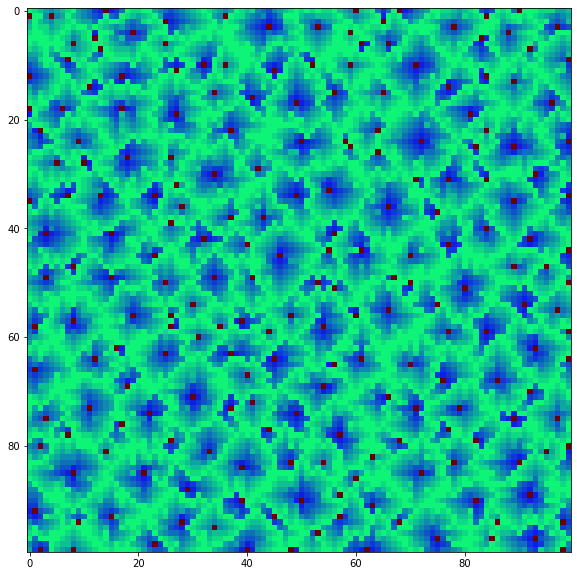

In [63]:
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm

def rgb_white2alpha(rgb, ensure_increasing=False):
    """
    Convert a set of RGB colors to RGBA with maximum transparency.
    
    The transparency is maximised for each color individually, assuming
    that the background is white.
    
    Parameters
    ----------
    rgb : array_like shaped (N, 3)
        Original colors.
    ensure_increasing : bool, default=False
        Ensure that alpha values are strictly increasing.
    
    Returns
    -------
    rgba : numpy.ndarray shaped (N, 4)
        Colors with maximum possible transparency, assuming a white
        background.
    """
    # The most transparent alpha we can use is given by the min of RGB
    # Convert it from saturation to opacity
    alpha = 1. - np.min(rgb, axis=1)
    if ensure_increasing:
        # Let's also ensure the alpha value is monotonically increasing
        a_max = alpha[0]
        for i, a in enumerate(alpha):
            alpha[i] = a_max = np.maximum(a, a_max)
    alpha = np.expand_dims(alpha, -1)
    # Rescale colors to discount the white that will show through from transparency
    rgb = (rgb + alpha - 1) / alpha
    # Concatenate our alpha channel
    return np.concatenate((rgb, alpha), axis=1)
    

def cmap_white2alpha(name, ensure_increasing=False, register=True):
    """
    Convert colormap to have the most transparency possible, assuming white background.
    
    Parameters
    ----------
    name : str
        Name of builtin (or registered) colormap.
    ensure_increasing : bool, default=False
        Ensure that alpha values are strictly increasing.
    register : bool, default=True
        Whether to register the new colormap.

    Returns
    -------
    cmap : matplotlib.colors.ListedColormap
        Colormap with alpha set as low as possible.
    """
    # Fetch the cmap callable
    cmap = plt.get_cmap(name)
    # Get the colors out from the colormap LUT
    rgb = cmap(np.arange(cmap.N))[:, :3]  # N-by-3
    # Convert white to alpha
    rgba = rgb_white2alpha(rgb, ensure_increasing=ensure_increasing)
    # Create a new Colormap object
    cmap_alpha = matplotlib.colors.ListedColormap(rgba, name=name + "_alpha")
    if register:
        matplotlib.cm.register_cmap(name=name + "_alpha", cmap=cmap_alpha)
    return cmap_alpha

# Get original Reds colormap
cmap_og = plt.get_cmap("Reds")

# Get our new version of the colormap with white2alpha
cmap_w2a = cmap_white2alpha("Reds")

data = parse('09')

heightmap = []
for line in data:
    heightmap.append([int(e) for e in line])

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(heightmap, cmap='winter')
im = ax.imshow(lowpoints, cmap=cmap_w2a)

plt.show()

In [64]:
i = "2199943210\n3987894921\n9856789892\n8767896789\n9899965678"
i = parse('09')
#i = i.split('\n')

grid = {}
low_points={}
count = 0
risk = 0

for y, e in enumerate(i):
    for x, f in enumerate(e):
        grid[str(x) + ',' + str(y)] = i[y][x]
        
for x in range(len(i[0])):
    for y in range(len(i)):
        nbr = neighbors(x, y)
        scores = [int(grid.get(str(x) + ',' + str(y)))]
        for n in nbr:
            scores.append(int(grid.get(n, 9)))
        scores = [1 if scores[0] < e else 0 for e in scores[1:]]
        if multiply(scores) != 0:
            low_points[str(x) + ',' + str(y)] = {}
        count += multiply(scores)
        risk += int(grid[str(x) + ',' + str(y)]) * multiply(scores)
count, risk, count + risk

#print(low_points)

def height(x, y, grid):
    c = str(x) + ',' + str(y)
    return grid.get(c, 9)

def depoint(pt):
    return [int(e) for e in pt.split(',')]
areas = []
for point in low_points:
    hist = [point]
    for pt in hist:
        #print(hist)
        x, y = depoint(pt)
        nbrs = [*neighbors(x, y)]
        #print(nbrs)
        _nbrs = []
        while nbrs:
            nbr = nbrs.pop(0)
            if int(grid.get(nbr, 9)) < 9 and nbr in grid and nbr not in hist:
                _nbrs.append(nbr)
        hist += _nbrs
    #print(len(hist))
    areas.append(len(hist))
multiply(sorted(areas)[-3:])

1059300

## [Day 10](https://adventofcode.com/2021/day/10)

In [100]:
i = parse('10')

scores = {
    ')': 3,
    ']': 57,
    '}': 1197,
    '>': 25137
}

score = 0

for num, line in enumerate(i):
    tmp = []
    for char in line:
        if char in '[{(<':
            tmp.append(char)
        elif char == ')' and tmp[-1] == '(':
            tmp.pop()
        elif char == '>' and tmp[-1] == '<':
            tmp.pop()
        elif char == ']' and tmp[-1] == '[':
            tmp.pop()
        elif char == '}' and tmp[-1] == '{':
            tmp.pop()
        else:
            #print("line " + str(num) + " is false")
            #i.pop(num)
            score += scores[char]
            break
score

392139

In [145]:
i = parse('10')

#i = "[({(<(())[]>[[{[]{<()<>>\n[(()[<>])]({[<{<<[]>>(\n{([(<{}[<>[]}>{[]{[(<()>\n(((({<>}<{<{<>}{[]{[]{}\n[[<[([]))<([[{}[[()]]]\n[{[{({}]{}}([{[{{{}}([]\n{<[[]]>}<{[{[{[]{()[[[]\n[<(<(<(<{}))><([]([]()\n<{([([[(<>()){}]>(<<{{\n<{([{{}}[<[[[<>{}]]]>[]]"
#i = i.split('\n')

scores = {
    '(': 1,
    '[': 2,
    '{': 3,
    '<': 4
}
score = []
while i:
    line = i.pop(0)
    tmp = []
    for char in line:
        get_score = True
        if char in '[{(<':
            tmp.append(char)
        elif tmp[-1] == '[{(<'[']})>'.find(char)]:
            tmp.pop()
        elif tmp[-1] != '[{(<'[']})>'.find(char)]:
            get_score = False
            break
    if get_score and len(tmp) != 0:
        tmpscore = 0
        for e in tmp[-1::-1]:
            tmpscore *= 5
            tmpscore += scores[e]
        score.append(tmpscore)
sorted(score)[int(len(score)/2)]

4001832844

## [Day 11](https://adventofcode.com/2021/day/11)

In [302]:
i = parse('11')

#i = "5483143223\n2745854711\n5264556173\n6141336146\n6357385478\n4167524645\n2176841721\n6882881134\n4846848554\n5283751526".split('\n')

def neighbor8(x, y):
    return (x-1, y-1), (x, y-1), (x+1, y-1), (x-1, y), (x+1, y), (x-1, y+1), (x, y+1), (x+1, y+1)


grid = {}
flash = 0

for j, y in enumerate(i):
    for k, x in enumerate(y):
        c = "(" + str(x) + ", " + str(y) + ")"
        grid[(k, j)] = int(i[j][k])

for step in range(100):
    for k, v in grid.items():
        grid[k] += 1
    while True:
        process = []
        for k, v in grid.items():
            if grid[k] > 9:
                flash += 1
                process.append(k)
                grid[k] = 0
        if not process:
            break
        while process:
            p = process.pop()
            for n in neighbor8(*p):
                if grid.get(n, 0) > 0:
                    grid[n] += 1
                    
step, flash

(99, 1732)

In [307]:
i = "5483143223\n2745854711\n5264556173\n6141336146\n6357385478\n4167524645\n2176841721\n6882881134\n4846848554\n5283751526".split('\n')
i = parse('11')
grid = {}
step = 0

for j, y in enumerate(i):
    for k, x in enumerate(y):
        c = "(" + str(x) + ", " + str(y) + ")"
        grid[(k, j)] = int(i[j][k])

while sum(grid.values()) != 0:
    step += 1
    for k, v in grid.items():
        grid[k] += 1
    while True:
        process = []
        for k, v in grid.items():
            if grid[k] > 9:
                flash += 1
                process.append(k)
                grid[k] = 0
        if not process:
            break
        while process:
            p = process.pop()
            for n in neighbor8(*p):
                if grid.get(n, 0) > 0:
                    grid[n] += 1
                    
print(step)

290


## [Day 12](https://adventofcode.com/2021/day/12)

In [432]:
i = "start-A\nstart-b\nA-c\nA-b\nb-d\nA-end\nb-end"
i = [e.split('-') for e in i.split('\n')]

caverns = {}

for e in i:
    k, v = e
    if k in caverns and v != 'start':
        caverns[k].append(v)
    elif v != 'start':
        caverns[k] = [v]
    if v in caverns and k != 'start':
        caverns[v].append(k)
    elif k != 'start':
        caverns[v] = [k]
        
caverns.pop('end')

paths = [['start']]

for path in paths:
    if path[-1] != 'end':
        options = caverns[path[-1]]
        for option in options:
            option1 = None
#             print(option, path)
            if option.isupper() and option != path[-1]:
                option1 = option
            elif option.islower() and option not in path:
                option1 = option
            if option1:
                paths.append(path.copy() + [option])
    else:
        pass

len(list(filter(lambda path: path[-1] == 'end', paths)))

10

In [435]:
i = """fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW"""
i = [e.split('-') for e in i.split('\n')]

caverns = {}

for e in i:
    k, v = e
    if k in caverns and v != 'start':
        caverns[k].append(v)
    elif v != 'start':
        caverns[k] = [v]
    if v in caverns and k != 'start':
        caverns[v].append(k)
    elif k != 'start':
        caverns[v] = [k]
        
caverns.pop('end')

paths = [['start']]

for path in paths:
    if path[-1] != 'end':
        options = caverns[path[-1]]
        for option in options:
            option1 = None
#             print(option, path)
            if option.isupper() and option != path[-1]:
                option1 = option
            elif option.islower() and option not in path:
                option1 = option
            if option1:
                paths.append(path.copy() + [option])
    else:
        pass

len(list(filter(lambda path: path[-1] == 'end', paths)))

226

In [433]:
i = parse('12')
i = [e.split('-') for e in i]

caverns = {}

for e in i:
    k, v = e
    if k in caverns and v != 'start':
        caverns[k].append(v)
    elif v != 'start':
        caverns[k] = [v]
    if v in caverns and k != 'start':
        caverns[v].append(k)
    elif k != 'start':
        caverns[v] = [k]
        
caverns.pop('end')

paths = [['start']]

for path in paths:
    if path[-1] != 'end':
        options = caverns[path[-1]]
        for option in options:
            option1 = None
#             print(option, path)
            if option.isupper() and option != path[-1]:
                option1 = option
            elif option.islower() and option not in path:
                option1 = option
            if option1:
                paths.append(path.copy() + [option])
    else:
        pass

len(list(filter(lambda path: path[-1] == 'end', paths)))

4773

In [493]:
i = "start-A\nstart-b\nA-c\nA-b\nb-d\nA-end\nb-end"
i = [e.split('-') for e in i.split('\n')]

caverns = {}

for e in i:
    k, v = e
    if k in caverns and v != 'start':
        caverns[k].append(v)
    elif v != 'start':
        caverns[k] = [v]
    if v in caverns and k != 'start':
        caverns[v].append(k)
    elif k != 'start':
        caverns[v] = [k]
        
caverns.pop('end')

paths = [['start']]

for path in paths:
    if path[-1] != 'end':
        options = caverns[path[-1]]
        for option in options:
            option1 = None
            if option == 'end':
                option1 = option
            else:
                if option.isupper() and option != path[-1]:
                    option1 = option
                if option.islower() and option != 'end':
                    for e in path:
                        if e.islower() and path.count(e) == 2 and option in path:
                            option1 = None
                            break
                        else:
                            option1 = option
            if option1:
                paths.append(path.copy() + [option1])

len(list(filter(lambda path: path[-1] == 'end', paths)))

{'start': ['A', 'b'], 'A': ['c', 'b', 'end'], 'c': ['A'], 'b': ['A', 'd', 'end'], 'd': ['b']}
1 A ['A', 'b'] A ['start']
2 A ['A', 'b'] A ['start']
1 b ['A', 'b'] b ['start']
2 b ['A', 'b'] b ['start']
1 c ['c', 'b', 'end'] c ['start', 'A']
2 c ['c', 'b', 'end'] c ['start', 'A']
1 b ['c', 'b', 'end'] b ['start', 'A']
2 b ['c', 'b', 'end'] b ['start', 'A']
2 end ['c', 'b', 'end'] end ['start', 'A']
1 A ['A', 'd', 'end'] A ['start', 'b']
2 A ['A', 'd', 'end'] A ['start', 'b']
1 d ['A', 'd', 'end'] d ['start', 'b']
2 d ['A', 'd', 'end'] d ['start', 'b']
2 end ['A', 'd', 'end'] end ['start', 'b']
1 A ['A'] A ['start', 'A', 'c']
2 A ['A'] A ['start', 'A', 'c']
1 A ['A', 'd', 'end'] A ['start', 'A', 'b']
2 A ['A', 'd', 'end'] A ['start', 'A', 'b']
1 d ['A', 'd', 'end'] d ['start', 'A', 'b']
2 d ['A', 'd', 'end'] d ['start', 'A', 'b']
2 end ['A', 'd', 'end'] end ['start', 'A', 'b']
1 c ['c', 'b', 'end'] c ['start', 'b', 'A']
2 c ['c', 'b', 'end'] c ['start', 'b', 'A']
1 b ['c', 'b', 'end'] b 

2 end ['c', 'b', 'end'] end ['start', 'b', 'A', 'c', 'A', 'b', 'A']
1 b ['b'] None ['start', 'b', 'A', 'c', 'A', 'b', 'd']
2 b ['b'] None ['start', 'b', 'A', 'c', 'A', 'b', 'd']
1 c ['c', 'b', 'end'] None ['start', 'b', 'A', 'b', 'A', 'c', 'A']
2 c ['c', 'b', 'end'] None ['start', 'b', 'A', 'b', 'A', 'c', 'A']
1 b ['c', 'b', 'end'] None ['start', 'b', 'A', 'b', 'A', 'c', 'A']
2 b ['c', 'b', 'end'] None ['start', 'b', 'A', 'b', 'A', 'c', 'A']
2 end ['c', 'b', 'end'] end ['start', 'b', 'A', 'b', 'A', 'c', 'A']
1 c ['c', 'b', 'end'] None ['start', 'b', 'd', 'b', 'A', 'c', 'A']
2 c ['c', 'b', 'end'] None ['start', 'b', 'd', 'b', 'A', 'c', 'A']
1 b ['c', 'b', 'end'] None ['start', 'b', 'd', 'b', 'A', 'c', 'A']
2 b ['c', 'b', 'end'] None ['start', 'b', 'd', 'b', 'A', 'c', 'A']
2 end ['c', 'b', 'end'] end ['start', 'b', 'd', 'b', 'A', 'c', 'A']
1 c ['c', 'b', 'end'] None ['start', 'A', 'c', 'A', 'c', 'A', 'b', 'A']
2 c ['c', 'b', 'end'] None ['start', 'A', 'c', 'A', 'c', 'A', 'b', 'A']
1 b ['

36

In [494]:
i = """fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW"""
i = [e.split('-') for e in i.split('\n')]

caverns = {}

for e in i:
    k, v = e
    if k in caverns and v != 'start':
        caverns[k].append(v)
    elif v != 'start':
        caverns[k] = [v]
    if v in caverns and k != 'start':
        caverns[v].append(k)
    elif k != 'start':
        caverns[v] = [k]
        
caverns.pop('end')

paths = [['start']]

for path in paths:
    if path[-1] != 'end':
        options = caverns[path[-1]]
        for option in options:
            option1 = None
            if option == 'end':
                option1 = option
            else:
                if option.isupper() and option != path[-1]:
                    option1 = option
                if option.islower() and option != 'end':
                    for e in path:
                        if e.islower() and path.count(e) == 2 and option in path:
                            option1 = None
                            break
                        else:
                            option1 = option
            if option1:
                paths.append(path.copy() + [option1])

len(list(filter(lambda path: path[-1] == 'end', paths)))

3509

In [496]:
i = parse('12')
i = [e.split('-') for e in i]

caverns = {}

for e in i:
    k, v = e
    if k in caverns and v != 'start':
        caverns[k].append(v)
    elif v != 'start':
        caverns[k] = [v]
    if v in caverns and k != 'start':
        caverns[v].append(k)
    elif k != 'start':
        caverns[v] = [k]
        
caverns.pop('end')

paths = [['start']]

for path in paths:
    if path[-1] != 'end':
        options = caverns[path[-1]]
        for option in options:
            option1 = None
            if option == 'end':
                option1 = option
            else:
                if option.isupper() and option != path[-1]:
                    option1 = option
                if option.islower() and option != 'end':
                    for e in path:
                        if e.islower() and path.count(e) == 2 and option in path:
                            option1 = None
                            break
                        else:
                            option1 = option
            if option1:
                paths.append(path.copy() + [option1])

len(list(filter(lambda path: path[-1] == 'end', paths)))

116985

## [Day 13](https://adventofcode.com/2021/day/13)

In [652]:
i = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5"""

def mirror(i):
    return i[::-1]

i = i.split('\n\n')

folds = re.findall(r'([xy])=(\d)', i[1])
i = [e.split(',') for e in i[0].split('\n')]
i = [[int(e) for e in f] for f in i]
maxx = max(zip(*i))[0]
maxy = max(zip(*i))[1]

grid = []

for y in range(maxy + 1):
    grid.append([0] * (maxx + 1))
    
for e in i:
    x, y = e
    grid[y][x] = 1    

for fold in folds:
#     print(grid)
    if fold[0] == 'y':
        p1 = grid[:int(fold[1])]
        p2 = mirror(grid[int(fold[1])+1:])
#         print(p1, p2)
        for y, line in enumerate(p1):
            for x, e in enumerate(line):
                if p2[y][x] == 1:
                    p1[y][x] = 1
                    #print(p1)
        grid = p1
#         print(grid)
            
#         print(grid)
                    
    if fold[0] == 'x':
        grid = list(zip(*grid))
        grid =  [[e for e in f] for f in grid]
        p1 = grid[:int(fold[1])]
        p2 = mirror(grid[int(fold[1])+1:])
        for y, line in enumerate(p1):
            for x, e in enumerate(line):
                if p2[y][x] == 1:
                    p1[y][x] = 1
        grid = p1
#         print(grid)
        grid = list(zip(*grid))
        grid =  [[e for e in f] for f in grid]              
                        
grid

[[1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [678]:
i = Input('13').read()

def mirror(i):
    return i[::-1]

i = i.strip().split('\n\n')

folds = re.findall(r'([xy])=(\d+)', i[1])
i = [e.split(',') for e in i[0].split('\n')]
i = [[int(e) for e in f] for f in i]

maxx = max(list(zip(*i))[0])
maxy = max(list(zip(*i))[1])

grid = []

for y in range(maxy + 1):
    grid.append([0] * (maxx + 1))
    
for e in i:
    x, y = e
    grid[y][x] = 1  

for fold in folds:
    print(sum([sum(e) for e in grid]))

    if fold[0] == 'y':
        p1 = grid[:int(fold[1])]
        p2 = mirror(grid[int(fold[1])+1:])

        for y, line in enumerate(p1):
            for x, e in enumerate(line):
                if p2[y][x] == 1:
                    p1[y][x] = 1
        grid = p1
                    
    if fold[0] == 'x':

        grid = list(zip(*grid))
        grid = [[e for e in f] for f in grid]
        p1 = grid[:int(fold[1])]
        p2 = mirror(grid[int(fold[1])+1:])

        for y, line in enumerate(p1):
            for x, e in enumerate(line):

                if p2[y][x] == 1:
                    p1[y][x] = 1
        grid = p1
        grid = list(zip(*grid))
        grid =  [[e for e in f] for f in grid]  

861
716
599
490
402
339
288
246
206
168
134
113
[[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]]


In [693]:
i = Input('13').read()

def mirror(i):
    return i[::-1]

i = i.strip().split('\n\n')

folds = re.findall(r'([xy])=(\d+)', i[1])
i = [e.split(',') for e in i[0].split('\n')]
i = [[int(e) for e in f] for f in i]

maxx = max(list(zip(*i))[0])
maxy = max(list(zip(*i))[1])

grid = []

for y in range(maxy + 1):
    grid.append([0] * (maxx + 1))
    
for e in i:
    x, y = e
    grid[y][x] = 1  

for fold in folds:
    #print(sum([sum(e) for e in grid]))

    if fold[0] == 'y':
        p1 = grid[:int(fold[1])]
        p2 = mirror(grid[int(fold[1])+1:])

        for y, line in enumerate(p1):
            for x, e in enumerate(line):
                if p2[y][x] == 1:
                    p1[y][x] = 1
        grid = p1
                    
    if fold[0] == 'x':

        grid = list(zip(*grid))
        grid = [[e for e in f] for f in grid]
        p1 = grid[:int(fold[1])]
        p2 = mirror(grid[int(fold[1])+1:])

        for y, line in enumerate(p1):
            for x, e in enumerate(line):

                if p2[y][x] == 1:
                    p1[y][x] = 1
        grid = p1
        grid = list(zip(*grid))
        grid =  [[e for e in f] for f in grid]
        
grid = [['#' if e==1 else '.' for e in f] for f in grid]

grid = [''.join(e) for e in grid]

grid


['###..###...##..#..#.####.###..#....###..',
 '#..#.#..#.#..#.#.#..#....#..#.#....#..#.',
 '#..#.#..#.#....##...###..###..#....#..#.',
 '###..###..#....#.#..#....#..#.#....###..',
 '#.#..#....#..#.#.#..#....#..#.#....#.#..',
 '#..#.#.....##..#..#.#....###..####.#..#.']

## [Day 14](https://adventofcode.com/2021/day/14)

In [720]:
i = """NNCB

CH -> B
HH -> N
CB -> H
NH -> C
HB -> C
HC -> B
HN -> C
NN -> C
BH -> H
NC -> B
NB -> B
BN -> B
BB -> N
BC -> B
CC -> N
CN -> C"""

i = i.split('\n\n')

sequence = [e for e in i[0]]

table = {key: value for (key,value) in re.findall(r'(\w+) -> (\w)', i[1])}

for step in range(10):
    out = []
    for j in range(len(sequence)-1):
        slc = sequence[j:j+2]
        key = ''.join(slc)
        out.append(slc[0])
        out.append(table[key])
    out.append(sequence[-1])
    sequence = out
    #print(''.join(sequence))

scores = {}
for char in ('NCBH'):
    scores[char] = sequence.count(char)
    
scores

{'N': 865, 'C': 298, 'B': 1749, 'H': 161}

In [729]:
i = Input('14').read()

i = i.split('\n\n')

sequence = [e for e in i[0]]

table = {key: value for (key,value) in re.findall(r'(\w+) -> (\w)', i[1])}

for step in range(10):
    out = []
    for j in range(len(sequence)-1):
        slc = sequence[j:j+2]
        key = ''.join(slc)
        out.append(slc[0])
        out.append(table[key])
    out.append(sequence[-1])
    sequence = out

scores = {}
for char in sequence:
    if char not in scores:
        scores[char] = sequence.count(char)
    
max(scores.values()) - min(scores.values())

3048

In [855]:
i = """NNCB

CH -> B
HH -> N
CB -> H
NH -> C
HB -> C
HC -> B
HN -> C
NN -> C
BH -> H
NC -> B
NB -> B
BN -> B
BB -> N
BC -> B
CC -> N
CN -> C"""

i = Input('14').read()

i = i.split('\n\n')

sequence = [e for e in i[0]]

i = re.findall(r'(\w+) -> (\w)', i[1])

table = {}
for e in i:
    k, v = e
    v1, v2 = k[0] + v, v + k[1] 
    table[k] = [v1, v2] 

scores = {}
first = table[''.join(sequence[:2])][0]
last = table[''.join(sequence[-2:])][1]

for i in range(len(sequence) - 1):
    key = ''.join(sequence[i:i+2])
    if key in scores:
        scores[key] += 1
    else:
        scores[key] = 1

for step in range(40):
    tmp = {}
    first = table[first][0]
    last = table[last][1]nb
    for k, v in scores.items():
        keys = table[k]
        for key in keys:
            if key in tmp:
                tmp[key] += v
            else:
                tmp[key] = v
    scores = tmp
    
scores
score = {}    
for key, value in scores.items():
    for e in key:
        if e in score:
            score[e] += value
        else:
            score[e] = value
score = {key:value/2 for key,value in score.items()}
int(max(score.values()) - min(score.values()))

3288891573057

## [Day 15](https://adventofcode.com/2021/day/15)

In [865]:
i = """1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581
"""

grid = {}

for y, j in enumerate(i.strip().split('\n')):
    for x, k in enumerate(j):
        c = str(x) + ',' + str(y)
        grid[c] = int(k)

x, y = (0, 0)

{'0,0': 1}
{'0,0': 1, '1,0': 1}
{'0,0': 1, '1,0': 1, '2,0': 6}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0': 7}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0': 7, '8,0': 4}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0': 7, '8,0': 4, '9,0': 2}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0': 7, '8,0': 4, '9,0': 2, '0,1': 1}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0': 7, '8,0': 4, '9,0': 2, '0,1': 1, '1,1': 3}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0': 7, '8,0': 4, '9,0': 2, '0,1': 1, '1,1': 3, '2,1': 8}
{'0,0': 1, '1,0': 1, '2,0': 6, '3,0': 3, '4,0': 7, '5,0': 5, '6,0': 1, '7,0':

{'0,0': 1,
 '1,0': 1,
 '2,0': 6,
 '3,0': 3,
 '4,0': 7,
 '5,0': 5,
 '6,0': 1,
 '7,0': 7,
 '8,0': 4,
 '9,0': 2,
 '0,1': 1,
 '1,1': 3,
 '2,1': 8,
 '3,1': 1,
 '4,1': 3,
 '5,1': 7,
 '6,1': 3,
 '7,1': 6,
 '8,1': 7,
 '9,1': 2,
 '0,2': 2,
 '1,2': 1,
 '2,2': 3,
 '3,2': 6,
 '4,2': 5,
 '5,2': 1,
 '6,2': 1,
 '7,2': 3,
 '8,2': 2,
 '9,2': 8,
 '0,3': 3,
 '1,3': 6,
 '2,3': 9,
 '3,3': 4,
 '4,3': 9,
 '5,3': 3,
 '6,3': 1,
 '7,3': 5,
 '8,3': 6,
 '9,3': 9,
 '0,4': 7,
 '1,4': 4,
 '2,4': 6,
 '3,4': 3,
 '4,4': 4,
 '5,4': 1,
 '6,4': 7,
 '7,4': 1,
 '8,4': 1,
 '9,4': 1,
 '0,5': 1,
 '1,5': 3,
 '2,5': 1,
 '3,5': 9,
 '4,5': 1,
 '5,5': 2,
 '6,5': 8,
 '7,5': 1,
 '8,5': 3,
 '9,5': 7,
 '0,6': 1,
 '1,6': 3,
 '2,6': 5,
 '3,6': 9,
 '4,6': 9,
 '5,6': 1,
 '6,6': 2,
 '7,6': 4,
 '8,6': 2,
 '9,6': 1,
 '0,7': 3,
 '1,7': 1,
 '2,7': 2,
 '3,7': 5,
 '4,7': 4,
 '5,7': 2,
 '6,7': 1,
 '7,7': 6,
 '8,7': 3,
 '9,7': 9,
 '0,8': 1,
 '1,8': 2,
 '2,8': 9,
 '3,8': 3,
 '4,8': 1,
 '5,8': 3,
 '6,8': 8,
 '7,8': 5,
 '8,8': 2,
 '9,8': 1,
 '0,9': 2,